In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
plt.rcParams['axes.grid'] = True # Turns grid lines on globally
%matplotlib inline

In [2]:
data = pd.read_excel('FFT_homework.xlsx')
pd.set_option('display.max_rows', len(data))

In [3]:
data.columns = ['time','Yt']

# Extract the sampling frequency
for i in range(len(data)):
    #print(data.loc[i,'time'])
    if data.loc[i,'time'] == 1:
        sampFreq = i
        print('Sampling Frequence = '+str(i)+'Hz')
data

Sampling Frequence = 32Hz


,time,Yt
0,0.00000,0.800000
1,0.03125,0.856749
2,0.06250,0.213968
3,0.09375,0.062209
4,0.12500,-0.168198
5,0.15625,-0.683667
6,0.18750,-0.373985
7,0.21875,-0.100007
8,0.25000,-0.050000
9,0.28125,0.622235


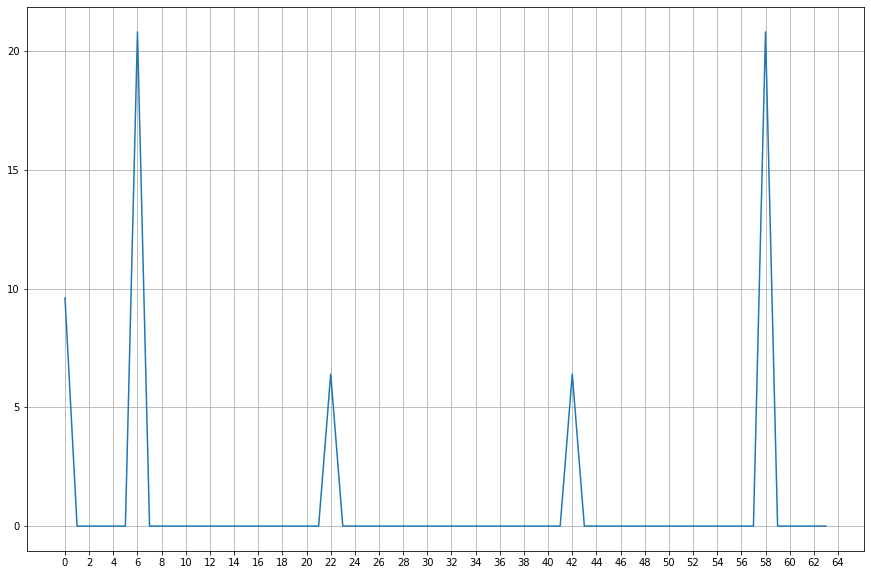

0      9.600000+0.000000j
1      0.000000+0.000000j
2     -0.000000+0.000000j
3     -0.000000-0.000000j
4     -0.000000+0.000000j
5     -0.000000-0.000000j
6     20.800000-0.000000j
7      0.000000+0.000000j
8      0.000000-0.000000j
9      0.000000-0.000000j
10     0.000000+0.000000j
11     0.000000-0.000000j
12     0.000000-0.000000j
13     0.000000+0.000000j
14     0.000000+0.000000j
15     0.000000+0.000000j
16     0.000000+0.000000j
17     0.000000+0.000000j
18     0.000000+0.000000j
19     0.000000+0.000000j
20     0.000000+0.000000j
21     0.000000+0.000000j
22    -0.000000-6.400000j
23     0.000000-0.000000j
24    -0.000000-0.000000j
25     0.000000-0.000000j
26     0.000000-0.000000j
27    -0.000000-0.000000j
28     0.000000-0.000000j
29    -0.000000-0.000000j
30     0.000000+0.000000j
31    -0.000000+0.000000j
32    -0.000000+0.000000j
33    -0.000000-0.000000j
34     0.000000-0.000000j
35    -0.000000+0.000000j
36     0.000000+0.000000j
37    -0.000000+0.000000j
38     0.000

In [10]:
fig1,ax = plt.subplots(figsize = [15,10])
N = len(data)
FFT = fft.fft(data.Yt)
ax.plot(np.arange(0,64,1),np.abs(FFT))
ax.set_xticks(np.arange(0,66,2))
plt.show()
for value,i in zip(FFT,range(N)):
    data.loc[i,'FFT'] = round(value,10)
print(data.FFT)

3.0 11.0


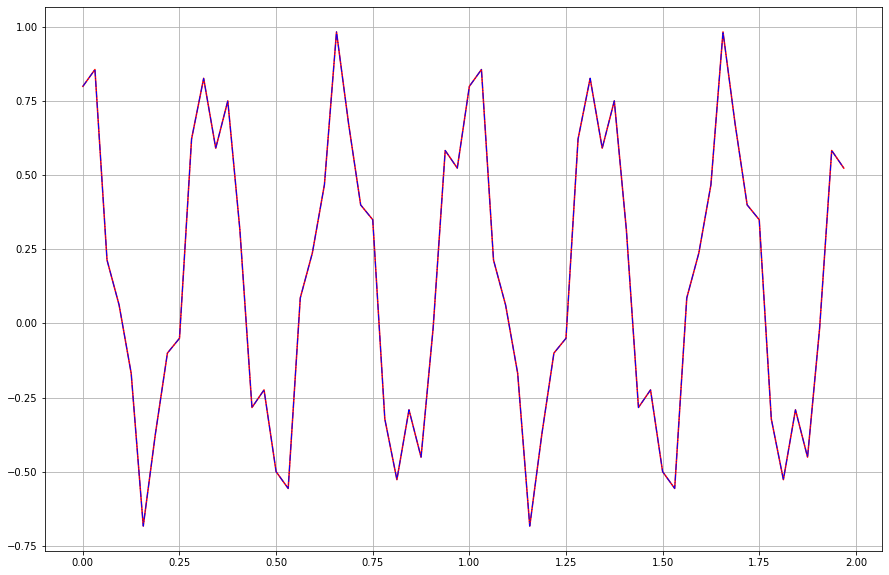

In [12]:
delF = sampFreq/N # deltaf = fs/N and is required to reconstruct the signals. 
f1 = delF*6
f2 = delF*22
print(f1,f2)
y1 = 2*20.8/N*np.cos(2*np.pi*6*delF*data.time)
y2 = 2*6.4/N*np.sin(2*np.pi*22*delF*data.time)
DC = 9.6/N

y = DC + y1 + y2
data.loc[:,'y'] = y

fig2,ax = plt.subplots(figsize = [15,10])
ax.plot(data.time,data.y,color = 'red')
ax.plot(data.time,data.Yt,color = 'blue',linewidth = 1,linestyle='-.')
plt.show()